In [54]:
# Imports
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, preprocessing
from sklearn.metrics import plot_confusion_matrix, classification_report, mean_squared_error
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from kneed import KneeLocator

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_curve, confusion_matrix
from sklearn.metrics import auc

np.random.seed(42)


%matplotlib inline

In [55]:
#carregar o arquivo csv 
#por convencao chamamos dataframe de df 
#df = pd.read_csv('................ , sep =';' , encoding = cp1252) ; separador e enconding , usecols =[...]
df = pd.read_csv('drug200.csv', names=['Age','Sex','BP','Cholesterol','Na_to_K','Drug'])
df.dtypes

Age            object
Sex            object
BP             object
Cholesterol    object
Na_to_K        object
Drug           object
dtype: object

In [56]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,Age,Sex,BP,Cholesterol,Na_to_K,Drug
1,23,F,HIGH,HIGH,25.355,DrugY
2,47,M,LOW,HIGH,13.093,drugC
3,47,M,LOW,HIGH,10.114,drugC
4,28,F,NORMAL,HIGH,7.798,drugX


In [57]:
df["Age"]=preprocessing.LabelEncoder().fit_transform(df["Age"])
df["Sex"]=preprocessing.LabelEncoder().fit_transform(df["Sex"])
df["BP"]=preprocessing.LabelEncoder().fit_transform(df["BP"])
df["Cholesterol"]=preprocessing.LabelEncoder().fit_transform(df["Cholesterol"])
df["Na_to_K"]=preprocessing.LabelEncoder().fit_transform(df["Na_to_K"])
df["Drug"]=preprocessing.LabelEncoder().fit_transform(df["Drug"])
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,57,2,0,0,198,0
1,8,0,1,1,129,1
2,30,1,2,1,51,4
3,30,1,2,1,5,4
4,12,0,3,1,170,5


In [58]:
#Vamos separar os dados entre a variável dependente e independente
x = df.drop(['Drug'], axis=1)
y = df['Drug']
x_train, x_test, y_train, y_test = train_test_split(x, y)

# MÉTODO DO COTOVELO

Text(0, 0.5, 'Dist**2')

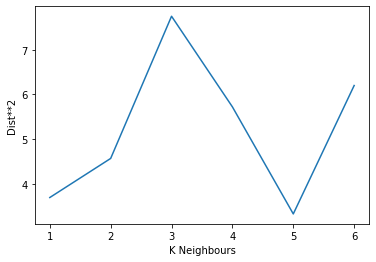

In [59]:
#função para o gráfico de cotovelo
def Elbow(k):
    test_score = []
    
    for i in k:
        reg = KNeighborsClassifier(n_neighbors = i)
        reg.fit(x_train, y_train)
        tmp = reg.predict(x_test)
        tmp = mean_squared_error(tmp, y_test)
        test_score.append(tmp**2)
    
    return test_score

#gerando gráfico utilizando de k=1 até k=40
k = range(1, 7)
test = Elbow(k)

plt.plot(k,test)
plt.xlabel("K Neighbours")
plt.ylabel("Dist**2")

# k ótimo

In [60]:
#k ótimo
min = np.min(test)
print(test)
k_otimo = 0
for item in test:
  #print(round(item, 2))
  if item==min:
    k_otimo = k[test.index(item)]

print("k ótimo: ", k_otimo)

[3.6924259900038447, 4.567858515955401, 7.752402921953094, 5.72241445597847, 3.325259515570934, 6.201076509034987]
k ótimo:  5


In [61]:
error = []
for i in range(1, 7):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

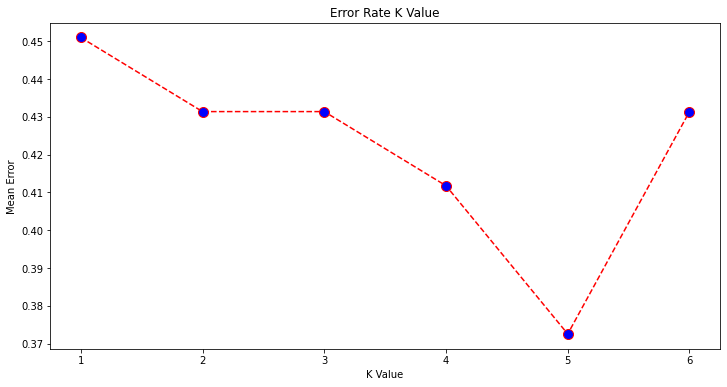

In [62]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 7), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

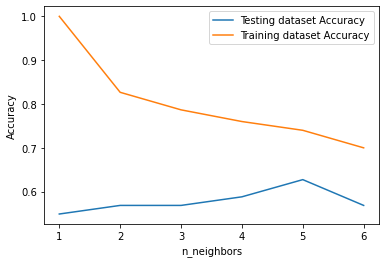

In [63]:
neighbors = np.arange(1, 7)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [64]:
knn = KNeighborsClassifier(n_neighbors=6)
 
knn.fit(x_train, y_train)
# Predict on dataset which model has not seen before
predictions = knn.predict(x_test)
print(predictions-y_test.values)

[ 4  0  0  0  0 -3  0  0  0 -1  0 -3  0  0  0  0 -3  2  0 -3  0  0  3  0
  2  0  3  3  1  0  0  3  2  0  1  0  0 -1  0  0  3  0  0  0  0  1  0  1
  2  2 -2]


In [65]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.95      0.95      0.95        21
           2       0.20      0.17      0.18         6
           3       0.50      0.12      0.20         8
           4       0.00      0.00      0.00         4
           5       0.33      0.58      0.42        12

    accuracy                           0.57        51
   macro avg       0.40      0.37      0.35        51
weighted avg       0.57      0.57      0.54        51



In [66]:
#criando classificador com kernel polinomial, foi o que apresentou menos erro para o conjunto de dados
clf = svm.SVC(kernel='poly')

#Encontrando o modelo ajustado aos daods
clf = clf.fit(x_train, y_train)

In [67]:
#Predizendo
predictions = clf.predict(x_test)

#Printando a diferença entre o dado predito e os dados de teste, caso dê 0 significa que foi correta a predição, caso dê 1 ou -1 significa que foi errada a predição
print(predictions-y_test.values)

[ 0 -4  0  0 -4 -4  0 -4 -1 -4  0 -4  0  0 -3  0 -3 -2 -4 -4  0  0 -1  0
 -2  0 -1 -1 -2  0  0 -1 -2  0 -3 -4  0 -2  0  0 -1 -4 -4  0  0 -3  0 -3
 -2 -2 -4]


In [68]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.42      1.00      0.59        21
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00        12

    accuracy                           0.41        51
   macro avg       0.07      0.17      0.10        51
weighted avg       0.17      0.41      0.24        51



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1